In [1]:
import os
import copy

from matplotlib import pyplot as plt

from tomato.audio.audioanalyzer import AudioAnalyzer
from tomato.symbolic.symbtranalyzer import SymbTrAnalyzer
from tomato.joint.jointanalyzer import JointAnalyzer


JointAnalyzer assumes the individual audio analysis and score analysis is applied earlier. 

In [2]:
# score inputs
symbtr_name = 'ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede'
txt_score_filename = os.path.join(symbtr_name, symbtr_name + '.txt')
mu2_score_filename = os.path.join(symbtr_name, symbtr_name + '.mu2')

# instantiate
audio_mbid = 'f970f1e0-0be9-4914-8302-709a0eac088e'
audio_filename = os.path.join(symbtr_name, audio_mbid, audio_mbid + '.mp3')

# instantiate analyzer objects
scoreAnalyzer = SymbTrAnalyzer(verbose=True)
audioAnalyzer = AudioAnalyzer(verbose=True)
jointAnalyzer = JointAnalyzer(verbose=True)


First we compute the input score and audio features for joint analysis.

In [3]:
# score (meta)data analysis
score_features = scoreAnalyzer.analyze(
    txt_score_filename, mu2_score_filename)

# predominant melody extraction
audio_pitch = audioAnalyzer.extract_pitch(audio_filename)
# NOTE: do not call pitch filter later as aligned_pitch_filter will be more effective


- Automatic phrase segmentation on the SymbTr-txt file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
  The call took 8.94 seconds to execute.
- Extracting predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 40.12 seconds to execute.


Next, you can use the single line call "analyze," which does all the available analysis simultaneously. You can then update the audio analysis using the joint analysis results.

- Extracting score-informed tonic and tempo of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 15.41 seconds to execute.
- Aligning audio recording ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3 and music score ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt.
  The call took 20.99 seconds to execute.
- Filtering predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3 after audio-score alignment.


/home/sertansenturk/Documents/notaIcra/code/tomato/tomato/joint/alignedpitchfilter.py:77: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  p[1] for p in pitch_corrected


  The call took 20.50 seconds to execute.
- Computing the note models for ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3


/home/sertansenturk/Documents/notaIcra/code/tomato/tomato/joint/alignednotemodel.py:143: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  p for p in pitch
/home/sertansenturk/Documents/notaIcra/code/tomato/tomato/joint/alignednotemodel.py:156: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  temp_pitch_vals = np.hstack(nn for nn in note_trajectories)


  The call took 19.03 seconds to execute.
- Computing pitch distribution of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 0.02 seconds to execute.
- Computing pitch class distribution of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Computing pitch distribution of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 0.02 seconds to execute.
  The call took 0.03 seconds to execute.
- Identifying the transposition of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 0.01 seconds to execute.
- Computing the melodic progression model of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e

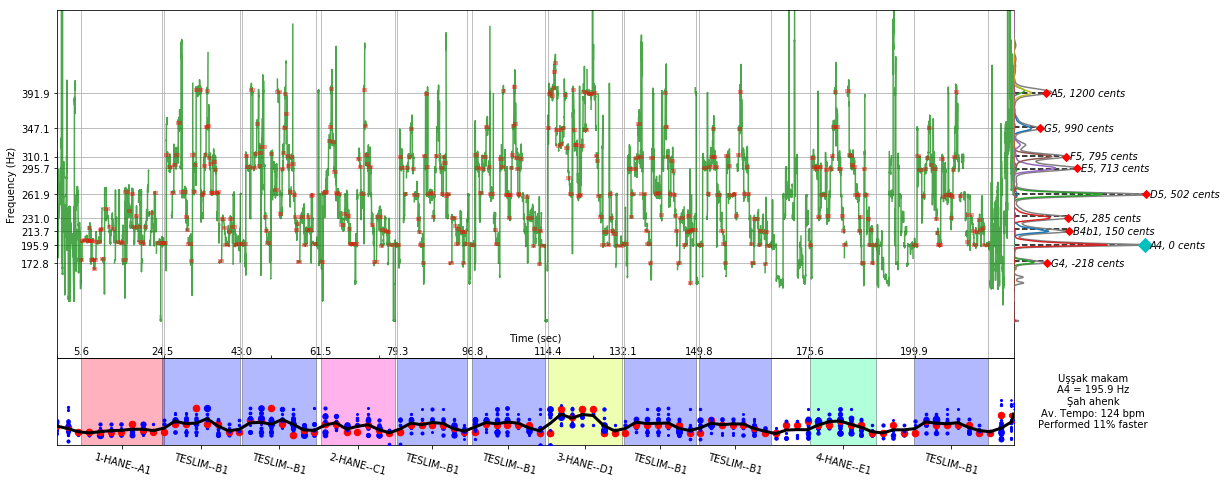

In [4]:
# joint analysis
joint_features, score_informed_audio_features = jointAnalyzer.analyze(
    txt_score_filename, score_features, audio_filename, audio_pitch)

# redo some steps in audio analysis
score_informed_audio_features = audioAnalyzer.analyze(
    metadata=False, pitch=False, **score_informed_audio_features)

# get a summary of the analysis
summarized_features = jointAnalyzer.summarize(
    audio_features={'pitch': audio_pitch},
    score_features=score_features, joint_features=joint_features, 
    score_informed_audio_features=score_informed_audio_features)

# plot
plt.rcParams['figure.figsize'] = [20, 8]
fig, ax = jointAnalyzer.plot(summarized_features)
ax[0].set_ylim([50, 500])
plt.show()


... or the individual calls are given  below.

In [5]:
# score (meta)data analysis
score_features = scoreAnalyzer.analyze(
    txt_score_filename, mu2_score_filename, symbtr_name=symbtr_name)

# predominant melody extraction
audio_pitch = audioAnalyzer.extract_pitch(audio_filename)

# joint analysis
# score-informed tonic and tempo estimation
tonic, tempo = jointAnalyzer.extract_tonic_tempo(
    txt_score_filename, score_features, audio_filename, audio_pitch)

# section linking and note-level alignment
aligned_sections, notes, section_links, section_candidates = jointAnalyzer.align_audio_score(
    txt_score_filename, score_features, audio_filename, audio_pitch, tonic, tempo)

# aligned pitch filter
pitch_filtered, notes_filtered = jointAnalyzer.filter_pitch(audio_pitch, notes)

# aligned note model
note_models, pitch_distribution, aligned_tonic = jointAnalyzer.compute_note_models(
    pitch_filtered, notes_filtered, tonic['symbol'])

# recompute the audio features using the filtered pitch and tonic
# pitch histograms
pitch_class_distribution = copy.deepcopy(pitch_distribution)
pitch_class_distribution.to_pcd()

# get the melodic progression model
melodic_progression = audioAnalyzer.compute_melodic_progression(pitch_filtered)

# transposition (ahenk) identification
transposition = audioAnalyzer.identify_transposition(aligned_tonic, aligned_tonic['symbol'])


- Automatic phrase segmentation on the SymbTr-txt file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
  The call took 9.73 seconds to execute.
- Extracting predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 41.34 seconds to execute.
- Extracting score-informed tonic and tempo of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
  The call took 16.08 seconds to execute.
- Aligning audio recording ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3 and music score ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt.
  The call took 20.02 seconds to execute.
- Filtering predominant melody of ussak--sazsemaisi--aksaks